In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import itertools
import re
from itertools import product
import operator
from functools import reduce
#from pandas import option_context
#%pip install openpyxl
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-pastel')
plt.style.use('seaborn-dark')

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_40592/1792471945.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_40592/1792471945.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [1]:
import matplotlib
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
matplotlib.style.use('dark_background')
color_list = ['white','skyblue','pink', 'tomato', 'slateblue', 'wheat', 'lightgrey', 'limegreen', 'royalblue', 'yellowgreen', 'lightseagreen', 'orchid', 'orange']
cmap = LinearSegmentedColormap.from_list("",color_list)

In [2]:
# Import all the google connexion packages
import os
import google.auth
from google.cloud import bigquery
from google.auth import impersonated_credentials

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/a20015173/.config/gcloud/legacy_credentials/ekaterina.rezanovich@adeo.com/adc.json"
client_1 = bigquery.Client(project = 'ccdp-transverse-data-dev')

In [4]:
filepath_1 = "./datasets/questions.parquet"
if not os.path.isfile(filepath_1):

    query = """
    select t1.survey_id, t1.name , t2.question_id, t2.name, t2.content
    from `dfdp-customer-exp-mt-prod.customer_experience_measure_bu001.client_experience_survey` as t1
    left join `dfdp-customer-exp-mt-prod.customer_experience_measure_bu001.client_experience_question` as t2 on t2.survey_id = t1.survey_id
    where t2.question_id in ('SV_81jKyfOtepO6Weq__QID1_NPS_GROUP', 'SV_4OUB8z9FwEgBiU6__QID1_NPS_GROUP', 'SV_5nFeSHRTsx1yxWC__QID1_NPS_GROUP', 'SV_77FLHcnyIyMM07Q__QID1_NPS_GROUP', 'SV_bj9J6UgbM2yIATQ__QID13_NPS_GROUP',
    'SV_2fA21joHLvPEZoi__QID1_NPS_GROUP', 'SV_5nVqXD824PZXj14__QID1_NPS_GROUP')"""

    dl_data = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")
    dl_data.to_parquet(filepath_1)

df_q = pd.read_parquet(filepath_1)

In [5]:
df_q.head(2)

,survey_id,name,question_id,name_1,content
0,SV_77FLHcnyIyMM07Q,LMFR - CLICK & COLLECT - PROD,SV_77FLHcnyIyMM07Q__QID1_NPS_GROUP,QID1_NPS_GROUP,"Suite à votre retrait marchandise, recommander..."
1,SV_bj9J6UgbM2yIATQ,LMFR - CUSTOMER CARE - PROD,SV_bj9J6UgbM2yIATQ__QID13_NPS_GROUP,QID13_NPS_GROUP,"Vous avez contacté notre service client, suite..."


In [3]:
filepath_2 = "./datasets/answers.parquet"
if not os.path.isfile(filepath_2):

    query = """
select t3.answer_id, t3.feedback_id, t3.question_id, t3.score, t3.score_category, t3.comment,
t4.touchpoint_id, t4.store_code, t4.user_id, t4.user_id_type, cast(t4.date as date) as answer_date
from `dfdp-customer-exp-mt-prod.customer_experience_measure_bu001.client_experience_answer` as t3
left join `dfdp-customer-exp-mt-prod.customer_experience_measure_bu001.client_experience_feedback` as t4 on t4.feedback_id = t3.feedback_id
where t3.question_id in ('SV_81jKyfOtepO6Weq__QID1_NPS_GROUP', 'SV_4OUB8z9FwEgBiU6__QID1_NPS_GROUP', 'SV_5nFeSHRTsx1yxWC__QID1_NPS_GROUP', 'SV_77FLHcnyIyMM07Q__QID1_NPS_GROUP', 'SV_bj9J6UgbM2yIATQ__QID13_NPS_GROUP',
'SV_2fA21joHLvPEZoi__QID1_NPS_GROUP', 'SV_5nVqXD824PZXj14__QID1_NPS_GROUP')
    """

    dl_data = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")
    dl_data.to_parquet(filepath_2)

df_a = pd.read_parquet(filepath_2)

In [4]:
df_a.head(2)

,answer_id,feedback_id,question_id,score,score_category,comment,touchpoint_id,store_code,user_id,user_id_type,answer_date
0,R_111w3BVzUYwknmY__QID1_NPS_GROUP,R_111w3BVzUYwknmY,SV_81jKyfOtepO6Weq__QID1_NPS_GROUP,8,Passif,"Bonjour, \nJe suis entièrement satisfait de ...",SV_81jKyfOtepO6Weq,<NA>,10217876,externaldatareference,2023-08-20
1,R_3htf0IgZ0ecDb8u__QID1_NPS_GROUP,R_3htf0IgZ0ecDb8u,SV_81jKyfOtepO6Weq__QID1_NPS_GROUP,10,Promoteur,None,SV_81jKyfOtepO6Weq,<NA>,54974624,externaldatareference,2023-08-16


In [8]:
df = df_a.merge(df_q, left_on = 'question_id', right_on = 'question_id', how='left')

In [9]:
print("from ", df['answer_date'].min())
print("to ", df['answer_date'].max())

from  2022-01-26
to  2023-08-17


In [10]:
df.duplicated().sum()

0

In [11]:
print('unique nb feedback_id = ', df['feedback_id'].nunique())
print('unique nb answer_id = ', df['answer_id'].nunique())
print('df size = ', df.shape[0])

unique nb feedback_id =  2504758
unique nb answer_id =  2504758
df size =  2504758


Piano Analytics Data for analysis

### !!! read excel file 

In [47]:
# test for the query 2022-10
query_global_1 ="""
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2022-10-01" and "2022-10-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_22_10 = client_1.query(query=query_global_1)

In [48]:
df_pa_22_10 = pa_22_10.to_dataframe()

In [49]:
# test for the query 2022-11
query_global_2 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2022-11-01" and "2022-11-30"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_22_11 = client_1.query(query=query_global_2)
df_pa_22_11 = pa_22_11.to_dataframe()

In [51]:
# test for the query 2022-12
query_global_3 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2022-12-01" and "2022-12-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_22_12 = client_1.query(query=query_global_3)
df_pa_22_12 = pa_22_12.to_dataframe()

In [52]:
# test for the query 2023-01
query_global_4 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-01-01" and "2023-01-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_23_01 = client_1.query(query=query_global_4)
df_pa_23_01 = pa_23_01.to_dataframe()

In [53]:
# test for the query 2023-02
query_global_5 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-02-01" and "2023-02-28"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_23_02 = client_1.query(query=query_global_5)
df_pa_23_02 = pa_23_02.to_dataframe()

In [54]:
# test for the query 2023-03
query_global_6 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-03-01" and "2023-03-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_23_03 = client_1.query(query=query_global_6)
df_pa_23_03 = pa_23_03.to_dataframe()

In [55]:
df_pa_2022 = df_pa_22_10.append([df_pa_22_11,df_pa_22_12]) 

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/3515860163.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pa_2022 = df_pa_22_10.append([df_pa_22_11,df_pa_22_12])


In [56]:
df_pa_2023_1 = df_pa_23_01.append([df_pa_23_02,df_pa_23_03]) 

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/3621163260.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pa_2023_1 = df_pa_23_01.append([df_pa_23_02,df_pa_23_03])


In [60]:
df_pa_2022 = df_pa_2022.fillna('0')

In [61]:
df_pa_2023_1 = df_pa_2023_1.fillna('0')

In [62]:
# test for the query 2023-04
query_global_7 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-04-01" and "2023-04-30"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_23_04 = client_1.query(query=query_global_7)
df_pa_23_04 = pa_23_04.to_dataframe()

In [63]:
# test for the query 2023-05
query_global_8 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-05-01" and "2023-05-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_23_05 = client_1.query(query=query_global_8)
df_pa_23_05 = pa_23_05.to_dataframe()

In [64]:
# test for the query 2023-06
query_global_9 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-06-01" and "2023-06-30"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_23_06 = client_1.query(query=query_global_9)
df_pa_23_06 = pa_23_06.to_dataframe()

In [65]:
# test for the query 2023-07
query_global_10 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-07-01" and "2023-07-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_23_07 = client_1.query(query=query_global_10)
df_pa_23_07 = pa_23_07.to_dataframe()

In [66]:
# test for the query 2023-08
query_global_11 = """
select
SITE_ID as site_id,  VISIT_DATE as visit_date, EVENT_NAME as event_name,
count (distinct VISIT_ID) as nb_visit_id, avg(VISIT_DURATION) as avg_visit_dur, max(VISIT_DURATION) as max_visit_dur, min(VISIT_DURATION) as min_visit_dur, 
avg(VISIT_PAGE_VIEWS) as avg_nb_page_views, max(VISIT_PAGE_VIEWS) as max_nb_page_views, min(VISIT_PAGE_VIEWS) as min_nb_page_views,
avg(CART_AMOUNT_ATI_WITH_SF) as avg_cart_todel, max(CART_AMOUNT_ATI_WITH_SF) as max_cart_todel, min(CART_AMOUNT_ATI_WITH_SF) as min_cart_todel,
avg(CART_TURNOVERTAXINCLUDED) as avg_cart_to, max(CART_TURNOVERTAXINCLUDED) as max_cart_to, min(CART_TURNOVERTAXINCLUDED) as min_cart_to,
avg(CART_NBDISTINCTPRODUCT) as avg_nb_dis_pr, max(CART_NBDISTINCTPRODUCT) as max_nb_dis_pr, min(CART_NBDISTINCTPRODUCT) as min_nb_dis_pr, 
avg(CART_QUANTITY) as avg_nb_pr, max(CART_QUANTITY) as max_nb_pr, min(CART_QUANTITY) as min_nb_pr
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-08-01" and "2023-08-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, visit_date,  event_name
"""
pa_23_08 = client_1.query(query=query_global_11)
df_pa_23_08 = pa_23_08.to_dataframe()

In [67]:
df_pa_2023_2 = df_pa_23_04.append([df_pa_23_05,df_pa_23_06]) 

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/463507110.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pa_2023_2 = df_pa_23_04.append([df_pa_23_05,df_pa_23_06])


In [68]:
df_pa_2023_3 = df_pa_23_07.append(df_pa_23_08) 

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/76881553.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pa_2023_3 = df_pa_23_07.append(df_pa_23_08)


In [69]:
df_pa_2023_2 = df_pa_2023_2.fillna('0')

In [70]:
df_pa_2023_3 = df_pa_2023_3.fillna('0')

apeend all dfs together

In [71]:
df_pa_1 = df_pa_2022.append(df_pa_2023_1) 

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/241771213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pa_1 = df_pa_2022.append(df_pa_2023_1)


In [72]:
df_pa_2 = df_pa_2023_2.append(df_pa_2023_3) 

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/2293322120.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pa_2 = df_pa_2023_2.append(df_pa_2023_3)


In [73]:
df_pa = df_pa_1.append(df_pa_2) 

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/462755340.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pa = df_pa_1.append(df_pa_2)


In [74]:
df_pa.shape[0]

1338

In [76]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 123
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   site_id            1338 non-null   object
 1   visit_date         1338 non-null   dbdate
 2   event_name         1338 non-null   object
 3   nb_visit_id        1338 non-null   Int64 
 4   avg_visit_dur      1338 non-null   object
 5   max_visit_dur      1338 non-null   object
 6   min_visit_dur      1338 non-null   object
 7   avg_nb_page_views  1338 non-null   object
 8   max_nb_page_views  1338 non-null   object
 9   min_nb_page_views  1338 non-null   object
 10  avg_cart_todel     1338 non-null   object
 11  max_cart_todel     1338 non-null   object
 12  min_cart_todel     1338 non-null   object
 13  avg_cart_to        1338 non-null   object
 14  max_cart_to        1338 non-null   object
 15  min_cart_to        1338 non-null   object
 16  avg_nb_dis_pr      1338 non-null   object
 

In [75]:
df_pa.head(2)

,site_id,visit_date,event_name,nb_visit_id,avg_visit_dur,max_visit_dur,min_visit_dur,avg_nb_page_views,max_nb_page_views,min_nb_page_views,...,min_cart_todel,avg_cart_to,max_cart_to,min_cart_to,avg_nb_dis_pr,max_nb_dis_pr,min_nb_dis_pr,avg_nb_pr,max_nb_pr,min_nb_pr
0,629890.000000000,2022-10-01,product.add_to_cart,52301,2030.843930780,36843.000000000,0E-9,83.656494340,1865.000000000,1.000000000,...,0,0,0,0,0,0,0,0,0,0
1,629569.000000000,2022-10-28,product.add_to_cart,5763,1667.367745366,14028.000000000,0E-9,39.752354907,460.000000000,0E-9,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# change types 
df_pa['site_id'] = df_pa['site_id'].astype('int')

In [79]:
df_pa['visit_date'] = pd.to_datetime(df_pa['visit_date'], format = "%Y-%m-%d")

In [80]:
df_pa['avg_visit_dur'] = df_pa['avg_visit_dur'].astype('float').round(2)
df_pa['max_visit_dur'] = df_pa['max_visit_dur'].astype('float').round(2)
df_pa['min_visit_dur'] = df_pa['min_visit_dur'].astype('float').round(2)

In [81]:
df_pa['avg_nb_page_views'] = df_pa['avg_nb_page_views'].astype('int')
df_pa['max_nb_page_views'] = df_pa['max_nb_page_views'].astype('int')
df_pa['min_nb_page_views'] = df_pa['min_nb_page_views'].astype('int')

In [82]:
df_pa['avg_cart_todel'] = df_pa['avg_cart_todel'].astype('float').round(2)
df_pa['max_cart_todel'] = df_pa['max_cart_todel'].astype('float').round(2)
df_pa['min_cart_todel'] = df_pa['min_cart_todel'].astype('float').round(2)

In [83]:
df_pa['avg_cart_to'] = df_pa['avg_cart_to'].astype('float').round(2)
df_pa['max_cart_to'] = df_pa['max_cart_to'].astype('float').round(2)
df_pa['min_cart_to'] = df_pa['min_cart_to'].astype('float').round(2)

In [84]:
df_pa['avg_nb_dis_pr'] = df_pa['avg_nb_dis_pr'].astype('int')
df_pa['max_nb_dis_pr'] = df_pa['max_nb_dis_pr'].astype('int')
df_pa['min_nb_dis_pr'] = df_pa['min_nb_dis_pr'].astype('int')

In [85]:
df_pa['avg_nb_pr'] = df_pa['avg_nb_pr'].astype('int')
df_pa['max_nb_pr'] = df_pa['max_nb_pr'].astype('int')
df_pa['min_nb_pr'] = df_pa['min_nb_pr'].astype('int')

In [88]:
df_pa.head(2)

,site_id,visit_date,event_name,nb_visit_id,avg_visit_dur,max_visit_dur,min_visit_dur,avg_nb_page_views,max_nb_page_views,min_nb_page_views,...,min_cart_todel,avg_cart_to,max_cart_to,min_cart_to,avg_nb_dis_pr,max_nb_dis_pr,min_nb_dis_pr,avg_nb_pr,max_nb_pr,min_nb_pr
0,629890,2022-10-01,product.add_to_cart,52301,2030.84,36843.0,0.0,83,1865,1,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,629569,2022-10-28,product.add_to_cart,5763,1667.37,14028.0,0.0,39,460,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [89]:
def site_name(df):
    if df['site_id'] == 629890 :
        return "website"
    elif df['site_id'] == 629569 :
        return "mobile_app"
    else:
        return "other"

In [90]:
df_pa['site_name'] = df_pa.apply(site_name, axis=1)

In [91]:
df_pa['month'] = df_pa['visit_date'].dt.month

In [92]:
df_pa['year'] = df_pa['visit_date'].dt.year
df_pa['year_month'] = df_pa['year'].astype('str')+' '+df_pa['month'].astype('str')

In [94]:
df_pa.head(2)

,site_id,visit_date,event_name,nb_visit_id,avg_visit_dur,max_visit_dur,min_visit_dur,avg_nb_page_views,max_nb_page_views,min_nb_page_views,...,avg_nb_dis_pr,max_nb_dis_pr,min_nb_dis_pr,avg_nb_pr,max_nb_pr,min_nb_pr,site_name,month,year,year_month
0,629890,2022-10-01,product.add_to_cart,52301,2030.84,36843.0,0.0,83,1865,1,...,0,0,0,0,0,0,website,10,2022,2022 10
1,629569,2022-10-28,product.add_to_cart,5763,1667.37,14028.0,0.0,39,460,0,...,0,0,0,0,0,0,mobile_app,10,2022,2022 10


In [96]:
df_pa_group_visit = df_pa.groupby(['year_month', 'event_name'])['nb_visit_id'].sum().reset_index()
df_pa_group_visit.head()

,year_month,event_name,nb_visit_id
0,2022 10,product.add_to_cart,1797210
1,2022 10,transaction.confirmation,392479
2,2022 11,product.add_to_cart,1867632
3,2022 11,transaction.confirmation,429698
4,2022 12,product.add_to_cart,1569760


In [146]:
# conversion rate of visit_id
df_pa_group_visit = df_pa.pivot_table(index='year_month', columns = 'event_name', values='nb_visit_id', aggfunc='sum').reset_index()

In [147]:
df_pa_group_visit['conversion_to_purchase_%'] = (df_pa_group_visit['transaction.confirmation']/\
                                               df_pa_group_visit['product.add_to_cart']*100).round(2)

In [148]:
df_pa_group_visit

event_name,year_month,product.add_to_cart,transaction.confirmation,conversion_to_purchase_%
0,2022 10,1797210,392479,21.84
1,2022 11,1867632,429698,23.01
2,2022 12,1569760,379608,24.18
3,2023 1,1841165,355648,19.32
4,2023 2,1690184,368769,21.82
5,2023 3,2286322,439618,19.23
6,2023 4,2050083,450564,21.98
7,2023 5,2387241,491854,20.6
8,2023 6,2173307,467304,21.5
9,2023 7,2317952,478136,20.63


In [139]:
df_pa_visit = df_pa[df_pa['event_name']=='product.add_to_cart'].groupby('year_month')['nb_visit_id'].sum().reset_index()
df_pa_visit

,year_month,nb_visit_id
0,2022 10,1797210
1,2022 11,1867632
2,2022 12,1569760
3,2023 1,1841165
4,2023 2,1690184
5,2023 3,2286322
6,2023 4,2050083
7,2023 5,2387241
8,2023 6,2173307
9,2023 7,2317952


<AxesSubplot: xlabel='year_month', ylabel='nb_visit_id'>

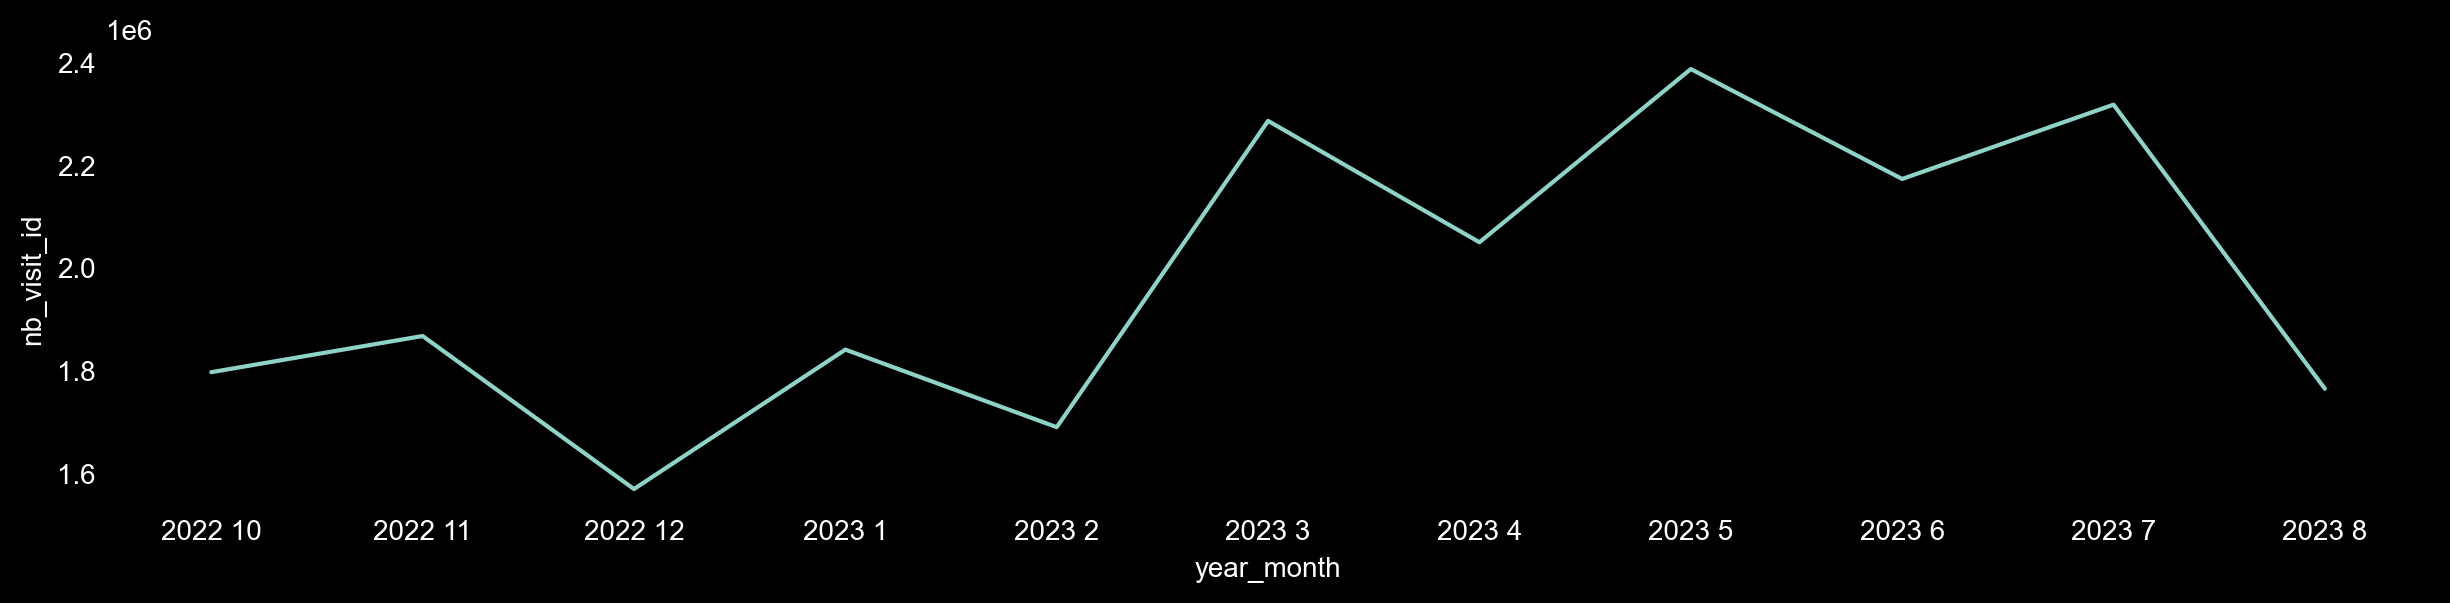

In [140]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df_pa_visit,  x="year_month", y="nb_visit_id")

<AxesSubplot: xlabel='year_month', ylabel='nb_visit_id'>

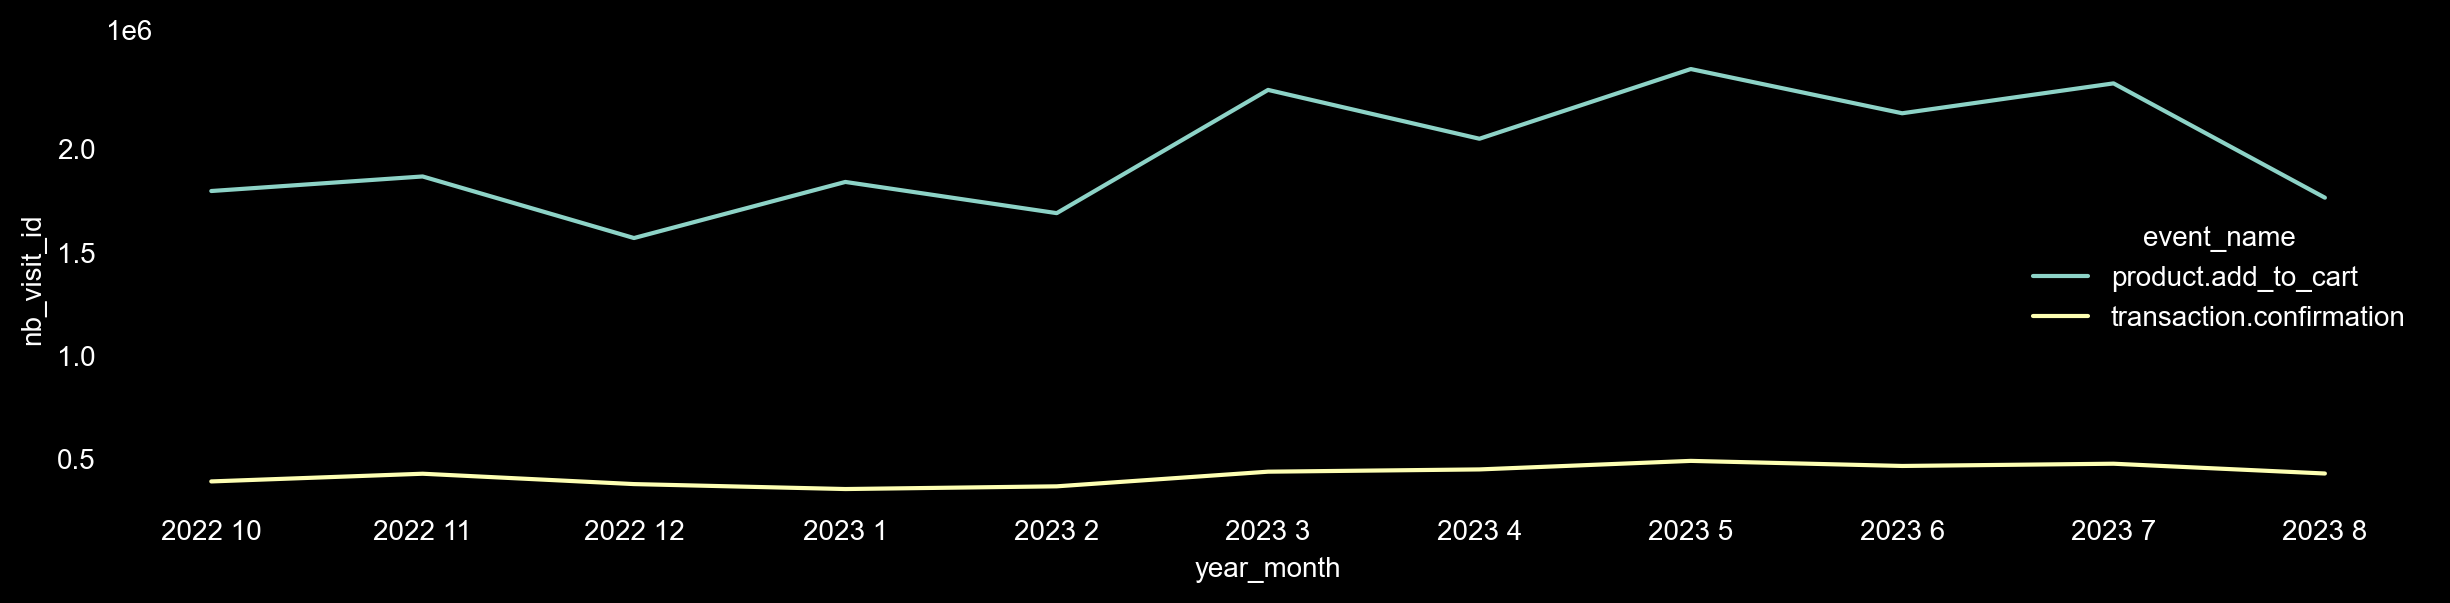

In [142]:
df_pa_visit_2 = df_pa.groupby(['year_month','event_name'])['nb_visit_id'].sum().reset_index()
plt.figure(figsize=(15,3))
sns.lineplot(data=df_pa_visit_2,  x="year_month", y="nb_visit_id", hue='event_name')

<AxesSubplot: xlabel='year_month', ylabel='conversion_to_purchase_%'>

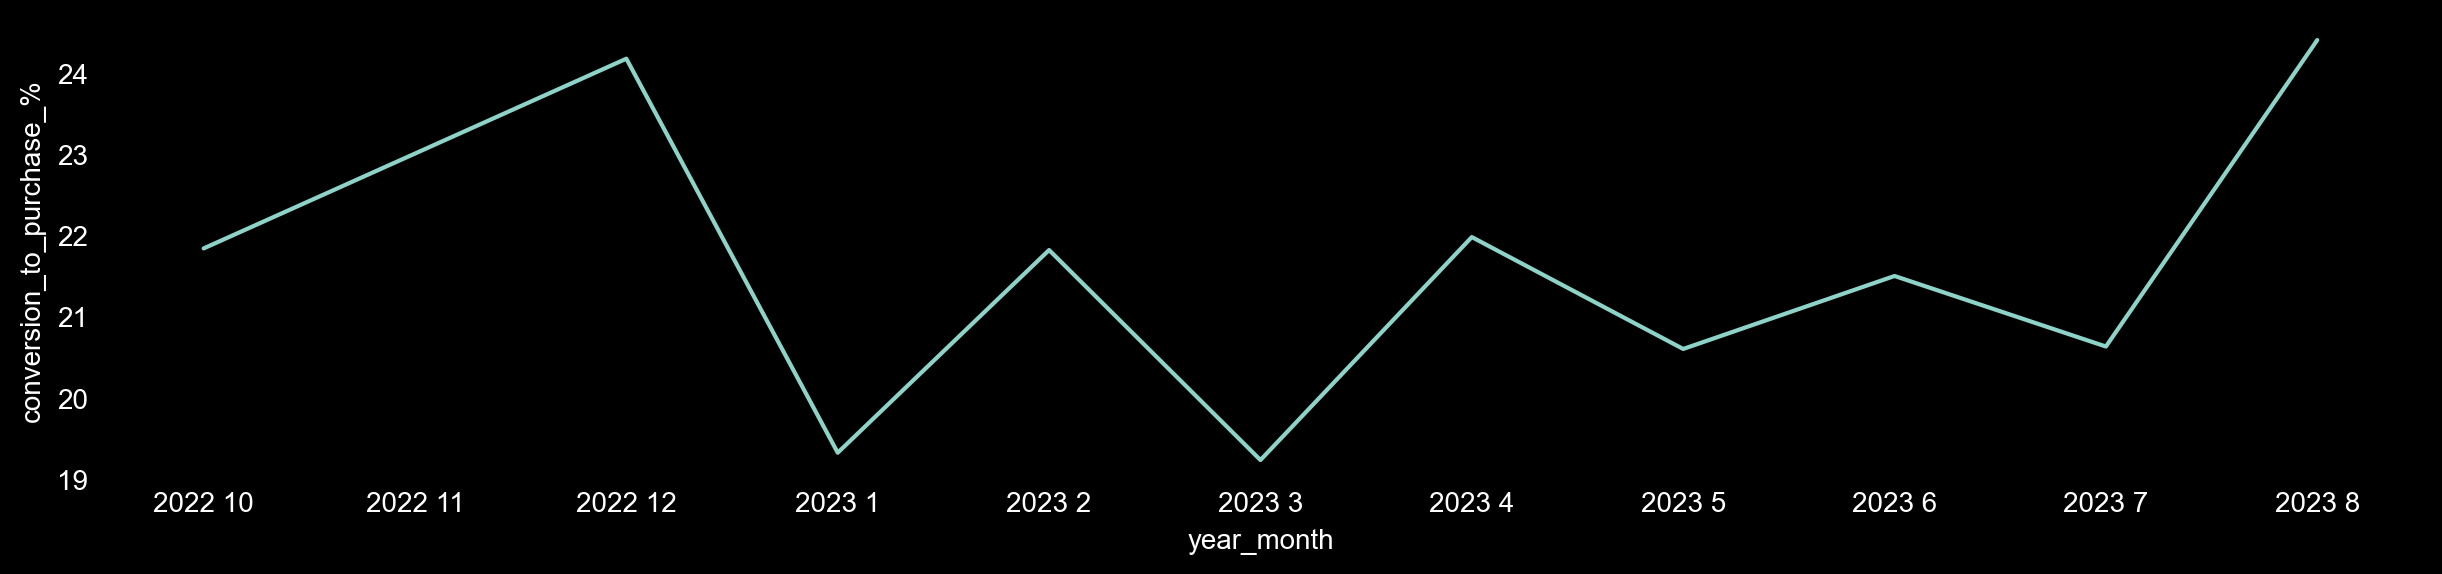

In [150]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df_pa_group_visit,  x='year_month', y="conversion_to_purchase_%")

Let's check the number of users in groups

### !!! read excel file

In [152]:
# test for the query 2022-10
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2022-10-01" and "2022-10-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_22_10 = client_1.query(query=query_1)
df_gr_22_10 = gr_22_10.to_dataframe()

In [153]:
# test for the query 2022-11
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2022-11-01" and "2022-11-30"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_22_11 = client_1.query(query=query_1)
df_gr_22_11 = gr_22_11.to_dataframe()

In [154]:
# test for the query 2022-12
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2022-12-01" and "2022-12-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_22_12 = client_1.query(query=query_1)
df_gr_22_12 = gr_22_12.to_dataframe()

In [155]:
# test for the query 2023-01
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-01-01" and "2023-01-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_23_01 = client_1.query(query=query_1)
df_gr_23_01 = gr_23_01.to_dataframe()

In [156]:
# test for the query 2023-02
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-02-01" and "2023-02-28"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_23_02 = client_1.query(query=query_1)
df_gr_23_02 = gr_23_02.to_dataframe()

In [157]:
# test for the query 2023-03
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-03-01" and "2023-03-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_23_03 = client_1.query(query=query_1)
df_gr_23_03 = gr_23_03.to_dataframe()

In [158]:
# test for the query 2023-04
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-04-01" and "2023-04-30"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_23_04 = client_1.query(query=query_1)
df_gr_23_04 = gr_23_04.to_dataframe()

In [159]:
# test for the query 2023-05
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-05-01" and "2023-05-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_23_05 = client_1.query(query=query_1)
df_gr_23_05 = gr_23_05.to_dataframe()

In [160]:
# test for the query 2023-06
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-06-01" and "2023-06-30"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_23_06 = client_1.query(query=query_1)
df_gr_23_06 = gr_23_06.to_dataframe()

In [161]:
# test for the query 2023-07
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-07-01" and "2023-07-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_23_07 = client_1.query(query=query_1)
df_gr_23_07 = gr_23_07.to_dataframe()

In [162]:
# test for the query 2023-08
query_1 = """
select
SITE_ID as site_id, extract(year from VISIT_DATE) as year, extract(week from VISIT_DATE) AS week, event_name,
count(distinct VISIT_ID) as nb_visit_id, 
count(distinct VISITOR_ID) as nb_visitors,
count(distinct USER_ID) as nb_users
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE DATE(visit_date) between "2023-08-01" and "2023-08-31"
and EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
group by site_id, year, week, event_name
"""
gr_23_08 = client_1.query(query=query_1)
df_gr_23_08 = gr_23_08.to_dataframe()

In [164]:
df_gr_1 = df_gr_22_10.append([df_gr_22_11, df_gr_22_12, df_gr_23_01])

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/1809959261.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gr_1 = df_gr_22_10.append([df_gr_22_11, df_gr_22_12, df_gr_23_01])


In [165]:
df_gr_2 = df_gr_23_02.append([df_gr_23_03, df_gr_23_04])

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/3431888248.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gr_2 = df_gr_23_02.append([df_gr_23_03, df_gr_23_04])


In [166]:
df_gr_3 = df_gr_23_05.append([df_gr_23_06, df_gr_23_07, df_gr_23_08])

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/1074496478.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gr_3 = df_gr_23_05.append([df_gr_23_06, df_gr_23_07, df_gr_23_08])


In [167]:
df_gr = df_gr_1.append([df_gr_2, df_gr_3])

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/1493581757.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gr = df_gr_1.append([df_gr_2, df_gr_3])


In [168]:
df_gr.shape[0]

232

In [179]:
df_gr = df_gr.sort_values(by=['year', 'week', 'site_id', 'event_name'])

In [184]:
df_gr.head()

,site_id,year,week,event_name,nb_visit_id,nb_visitors,nb_users,year_week
20,629569,2022,39,product.add_to_cart,6953,6247,4241,2022_39
14,629569,2022,39,transaction.confirmation,1713,1682,0,2022_39
7,629890,2022,39,product.add_to_cart,52301,48956,13401,2022_39
22,629890,2022,39,transaction.confirmation,11122,11008,6987,2022_39
23,629569,2022,40,product.add_to_cart,41004,29881,20279,2022_40


In [177]:
df_gr['site_id'] = df_gr['site_id'].astype('int')

In [183]:
df_gr['year_week'] = df_gr['year'].astype('str') + "_" + df_gr['week'].astype('str')

<AxesSubplot: xlabel='year_week', ylabel='nb_visitors'>

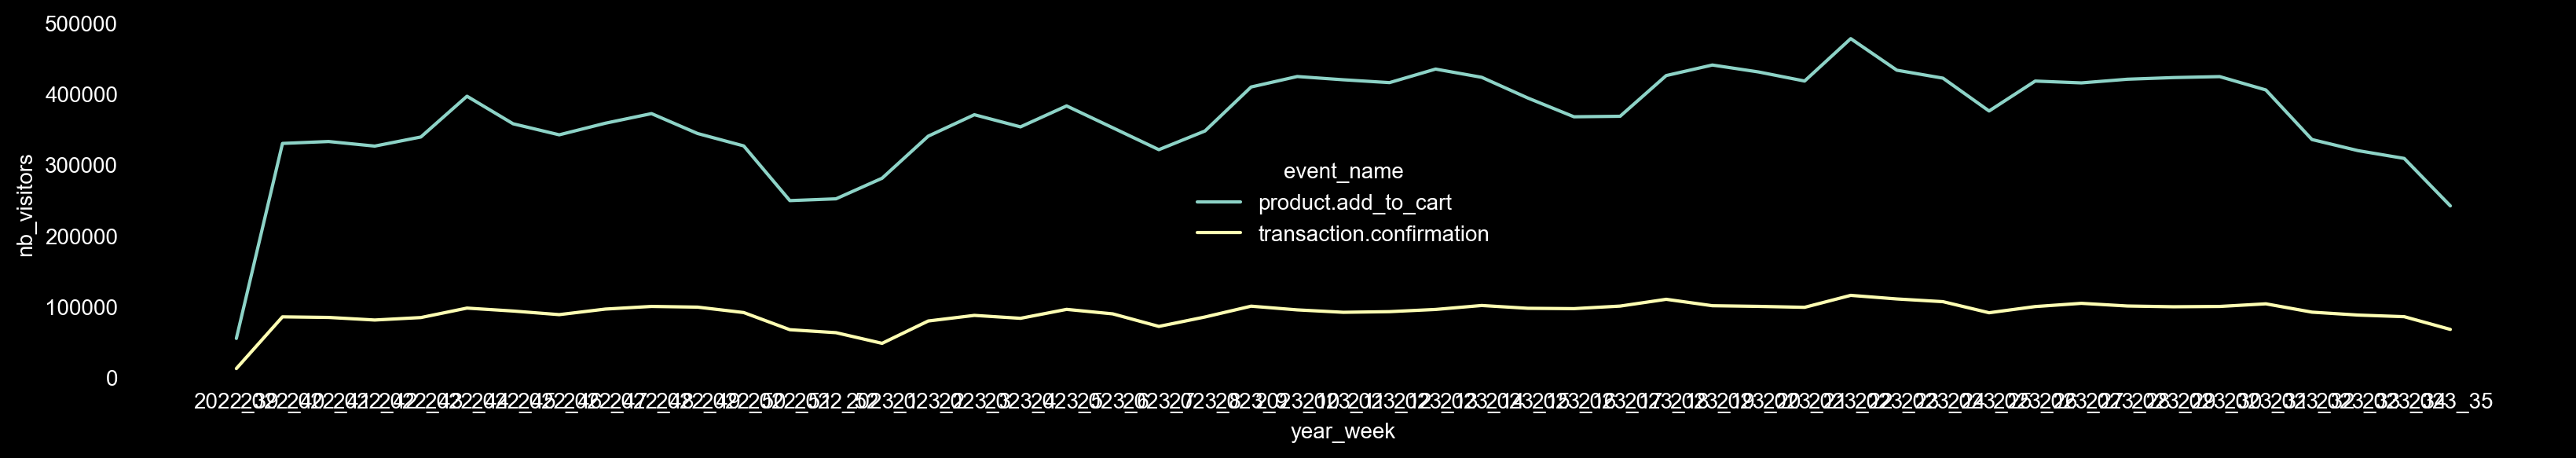

In [194]:
df_gr_visitor = df_gr.groupby(['year', 'week','year_week', 'event_name'])['nb_visitors'].sum().reset_index()
df_gr_visitor = df_gr_visitor.sort_values(by=['year', 'week'])
plt.figure(figsize=(20,3))
sns.lineplot(data=df_gr_visitor,  x='year_week', y="nb_visitors", hue='event_name')

In [202]:
df_gr_visitor.head()

,year,week,year_week,event_name,nb_visitors
0,2022,39,2022_39,product.add_to_cart,55203
1,2022,39,2022_39,transaction.confirmation,12690
2,2022,40,2022_40,product.add_to_cart,330319
3,2022,40,2022_40,transaction.confirmation,85667
4,2022,41,2022_41,product.add_to_cart,333007


In [203]:
df_gr_visitor[df_gr_visitor['year']==2023]

,year,week,year_week,event_name,nb_visitors
28,2023,1,2023_1,product.add_to_cart,281225
29,2023,1,2023_1,transaction.confirmation,48310
30,2023,2,2023_2,product.add_to_cart,340567
31,2023,2,2023_2,transaction.confirmation,79817
32,2023,3,2023_3,product.add_to_cart,370799
...,...,...,...,...,...
93,2023,33,2023_33,transaction.confirmation,88163
94,2023,34,2023_34,product.add_to_cart,309149
95,2023,34,2023_34,transaction.confirmation,85896
96,2023,35,2023_35,product.add_to_cart,242209


In [206]:
df_gr_visitor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         98 non-null     Int64 
 1   week         98 non-null     Int64 
 2   year_week    98 non-null     object
 3   event_name   98 non-null     object
 4   nb_visitors  98 non-null     Int64 
dtypes: Int64(3), object(2)
memory usage: 4.9+ KB


/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_94170/927453365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitors_2023['week'] = visitors_2023['week'].astype('str')


<AxesSubplot: xlabel='week', ylabel='nb_visitors'>

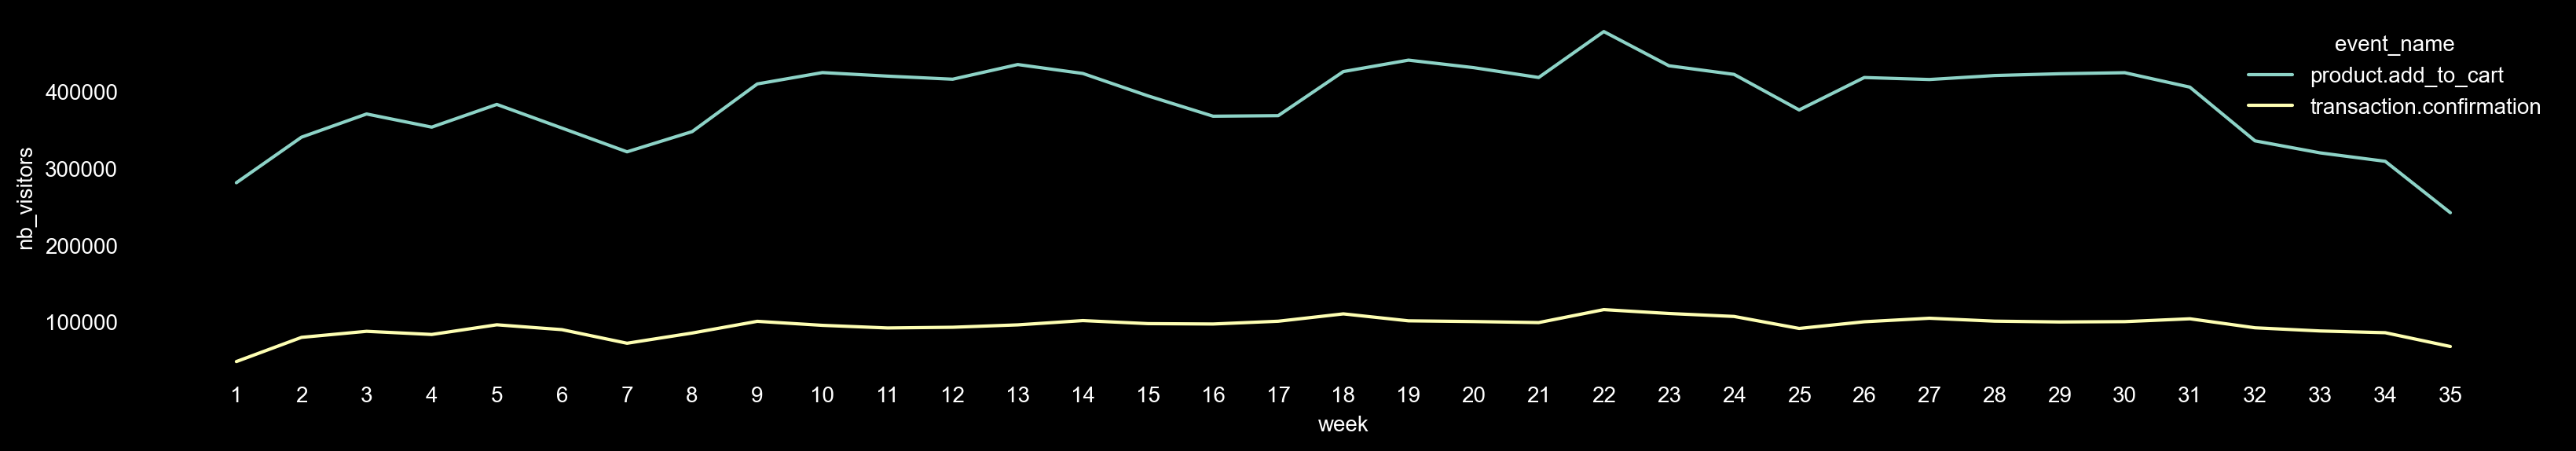

In [207]:
visitors_2023 = df_gr_visitor[df_gr_visitor['year']==2023]
visitors_2023['week'] = visitors_2023['week'].astype('str')
plt.figure(figsize=(20,3))
sns.lineplot(data=visitors_2023,  x='week', y="nb_visitors", hue='event_name')

Let's find first user session and the futurs

### !!! use parquet files !

In [214]:
# test for the query 2022-10
query_vis_1 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2022-10-01" and "2022-10-31" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_22_10 = client_1.query(query=query_vis_1)
df_vis_22_10 = vis_22_10.to_dataframe()

In [215]:
df_vis_22_10.to_parquet('df_vis_22_10.parquet.gzip', compression='gzip')

In [217]:
# test for the query 2022-11
query_vis_2 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2022-11-01" and "2022-11-30" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_22_11 = client_1.query(query=query_vis_2)
df_vis_22_11 = vis_22_11.to_dataframe()
df_vis_22_11.to_parquet('df_vis_22_11.parquet.gzip', compression='gzip')

In [218]:
# test for the query 2022-12
query_vis_3 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2022-12-01" and "2022-12-31" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_22_12 = client_1.query(query=query_vis_3)
df_vis_22_12 = vis_22_12.to_dataframe()

In [219]:
df_vis_22_12.to_parquet('df_vis_22_12.parquet.gzip', compression='gzip')

In [220]:
# test for the query 2023-01
query_vis_4 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2023-01-01" and "2023-01-31" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_23_01 = client_1.query(query=query_vis_4)
df_vis_23_01 = vis_23_01.to_dataframe()

In [221]:
df_vis_23_01.to_parquet('df_vis_23_01.parquet.gzip', compression='gzip')

In [222]:
# test for the query 2023-02
query_vis_5 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2023-02-01" and "2023-02-28" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_23_02 = client_1.query(query=query_vis_5)
df_vis_23_02 = vis_23_02.to_dataframe()

In [223]:
df_vis_23_02.to_parquet('df_vis_23_02.parquet.gzip', compression='gzip')

In [224]:
# test for the query 2023-03
query_vis_6 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2023-03-01" and "2023-03-31" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_23_03 = client_1.query(query=query_vis_6)
df_vis_23_03 = vis_23_03.to_dataframe()

In [225]:
df_vis_23_03.to_parquet('df_vis_23_03.parquet.gzip', compression='gzip')

In [226]:
# test for the query 2023-04
query_vis_7 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2023-04-01" and "2023-04-30" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_23_04 = client_1.query(query=query_vis_7)
df_vis_23_04 = vis_23_04.to_dataframe()

In [227]:
df_vis_23_04.to_parquet('df_vis_23_04.parquet.gzip', compression='gzip')

In [228]:
# test for the query 2023-05
query_vis_8 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2023-05-01" and "2023-05-31" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_23_05 = client_1.query(query=query_vis_8)
df_vis_23_05 = vis_23_05.to_dataframe()

In [229]:
df_vis_23_05.to_parquet('df_vis_23_05.parquet.gzip', compression='gzip')

In [230]:
# test for the query 2023-06
query_vis_9 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2023-06-01" and "2023-06-30" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_23_06 = client_1.query(query=query_vis_9)
df_vis_23_06 = vis_23_06.to_dataframe()

In [231]:
df_vis_23_06.to_parquet('df_vis_23_06.parquet.gzip', compression='gzip')

In [232]:
# test for the query 2023-07
query_vis_10 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2023-07-01" and "2023-07-31" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_23_07 = client_1.query(query=query_vis_10)
df_vis_23_07 = vis_23_07.to_dataframe()

In [233]:
df_vis_23_07.to_parquet('df_vis_23_07.parquet.gzip', compression='gzip')

In [234]:
# test for the query 2023-08
query_vis_11 = """
select
VISITOR_ID as visitor_id, USER_ID as user_id, event_name, VISIT_DATE as visit_date
from `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
WHERE 
DATE(visit_date) between "2023-08-01" and "2023-08-31" and
EVENT_NAME in ('transaction.confirmation', 'product.add_to_cart')
"""
vis_23_08 = client_1.query(query=query_vis_11)
df_vis_23_08 = vis_23_08.to_dataframe()

In [235]:
df_vis_23_08.to_parquet('df_vis_23_08.parquet.gzip', compression='gzip')

In [236]:
df_vis_23_08

,visitor_id,user_id,event_name,visit_date
0,3BB99AAA03E4D94D54247C12E03F62FFE8A78D95,78880531,product.add_to_cart,2023-08-07
1,20C26879F8615191DF8C79FB173EEEB656DC7882,None,product.add_to_cart,2023-08-07
2,DBE4E27B49F09BF383D8270DA57258ADC11B2338,58182359,product.add_to_cart,2023-08-07
3,9F49BE6393B9E7855FE54E6579C1BF8DF8C44494,None,product.add_to_cart,2023-08-07
4,3EB1EB5CD562C17728CCBBE524DDB65699B8F130,68330166,product.add_to_cart,2023-08-07
...,...,...,...,...
4669236,94E98157B8CEB5242D0EEFEA3BAD11695475F255,None,transaction.confirmation,2023-08-10
4669237,140495DAD5CD3FD9253EA73B5E9CD7A503010BD0,96550143,transaction.confirmation,2023-08-10
4669238,C153D2B5BAA67C9BB161EA6D3BDA5FE52E0AC939,None,transaction.confirmation,2023-08-10
4669239,C01C8783EDDF53C90922DE920C64308F0F7327D7,73223949,transaction.confirmation,2023-08-10
